<a href="https://colab.research.google.com/github/trallala9/-workspace-2/blob/master/autonomous_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Jun 16 17:21:50 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    16W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [34]:
import numpy as np
import matplotlib.pyplot as plt
!pip install imgaug
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import random


In [0]:
X = np.load('X.npy')
y = np.load('y.npy')

In [36]:
print(X.shape, y.shape)

(12846, 60, 80, 3) (12846,)


(array([9.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.100e+01, 6.000e+00,
        6.000e+00, 1.500e+01, 3.500e+01, 1.400e+01, 4.100e+01, 6.200e+01,
        8.300e+01, 9.300e+01, 1.240e+02, 1.120e+02, 2.200e+02, 3.478e+03,
        7.500e+01, 9.000e+01, 1.030e+02, 1.330e+02, 1.170e+02, 1.220e+02,
        1.140e+02, 3.546e+03, 9.000e+01, 1.010e+02, 1.250e+02, 1.020e+02,
        1.140e+02, 1.030e+02, 3.446e+03, 3.000e+01, 1.500e+01, 2.000e+01,
        1.100e+01, 1.300e+01, 1.200e+01, 9.000e+00, 3.000e+00, 1.200e+01,
        6.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 5.000e+00]),
 array([-1.4  , -1.344, -1.288, -1.232, -1.176, -1.12 , -1.064, -1.008,
        -0.952, -0.896, -0.84 , -0.784, -0.728, -0.672, -0.616, -0.56 ,
        -0.504, -0.448, -0.392, -0.336, -0.28 , -0.224, -0.168, -0.112,
        -0.056,  0.   ,  0.056,  0.112,  0.168,  0.224,  0.28 ,  0.336,
         0.392,  0.448,  0.504,  0.56 ,  0.616,  0.672,  0.728,  0.784,
         0.84 , 

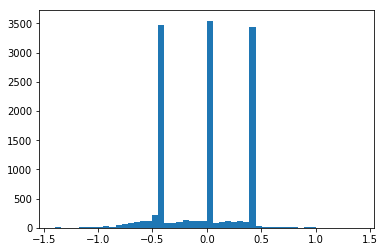

In [37]:
plt.hist(y, 50)

0.0


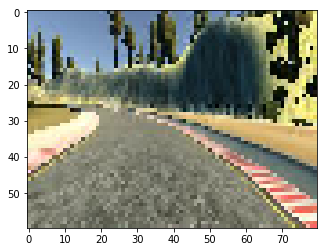

-0.0


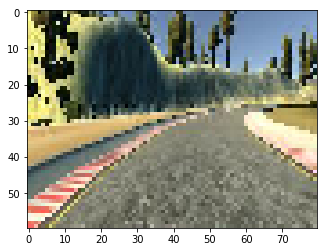

In [41]:
def augment(img, steering_angle):
  # efekt odbicie w lustrze FLIP
  if random.random() > 0.5:
    img = img[:, ::-1, :]
    steering_angle = -steering_angle
  return img, steering_angle
  # blur
  blurer = iaa.GaussianBlur(iap.Uniform(0.1, 6.0))
  img = blurer.augment_image(img)
  return img, steering_angle
  # shuffle channel
  sh = iaa.ChannelShuffle(p=1)
  img = sh.augment_image(img)
  return img, steering_angle

plt.imshow(X[0])
print(y[0])
plt.show();

img, angle = augment(X[0], y[0])
plt.imshow(img)
print(angle)
plt.show();